# les 5 temps

## temps solaire vrai
le temps solaire vrai TSV est basé sur le déplacement apparent du soleil au cours de la journée. Il est midi solaire à l'instant où le soleil atteint son point de culmination en un endroit donné. A cet instant, l'angle horaire du soleil $w$ est égal à 0

\begin{equation*}
w (ou AH) = 15 ( TSV -12 )
\end{equation*}

A chaque heure qui s'écoule correspond une augmentation de 15° de l'angle horaire

## temps solaire moyen
Le temps solaire moyen, appelé aussi temps solaire local, est fondé sur un soleil qui se déplacerait autour de l'équateur à vitesse constante tout au long de l'année. Cette vitesse moyenne est d'un tour en 24 heures.

L'expérience montre que les passages du soleil dans le plan méridien d'un lieu donné ne se succèdent pas avec 24 heures d'intervale et le midi vrai peut atteindre un avance de 16 minutes ou un retard de 14 minutes selon l'époque de l'année. Les 2 facteurs d'influence à l'origine de cette variation sont :
- l'ellipticité de la trajectoire de la terre autour du soleil
- l'obliquité de son axe de rotation par rapport à son plan orbital autour du soleil

Il en résulte une différence entre le temps solaire moyen et le temps solaire vrai, appelée équation du temps (E).


\begin{equation*}
TSV - TSM = E
\end{equation*}

Sachant que :

\begin{equation*}
E = 299.2 ( 0.000075 + 0.001868 cos(B) - 0.032077 sin(B) - 0.014615 cos(2B) - 0.04089 sin(2B))
\end{equation*}

Avec $ B = \frac{(n-1)360}{365}$ où n représente le jour de l'année (1er janvier = jour 1)

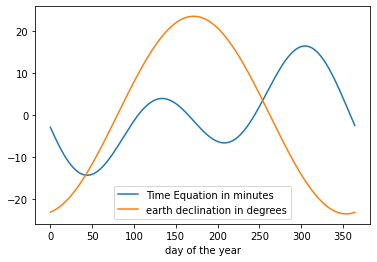

In [6]:
from sunModel import deltaT, earthDeclination
import numpy as np
import matplotlib.pylab as plt

E=np.zeros(365)
delta=np.zeros(365)
for j in range(1,366):
    E[j-1]=deltaT(j,hour=False)
    delta[j-1]=earthDeclination(j,rad=False)

plt.subplot(111)
plt.plot(E,label="Time Equation in minutes")
plt.plot(delta,label="earth declination in degrees")
plt.xlabel("day of the year")
plt.legend()
plt.show()

## UTC - Universal Time Coordinated ou temps universel coordonné

On peut considérer que le temps UTC correspond au temps moyen de Greenwich.

L'heure UTC est dérivée du temps atomique international (TAI) dont elle diffère seulement par un nombre entier de secondes.

Pour un point d'observation de longitude $\lambda$, on peut écrire que le temps solaire moyen vérifie l'équation suivante :

\begin{equation*}
TSM = UTC + \frac{\lambda}{15}
\end{equation*}

En effet, l'ensemble de la terre a été découpé en 24 fuseaux horaires correspondant aux 24 heures de la rotation de la terre. Chaque fois que l'on se déplace de $\frac{360}{24}$ ou 15° de longitude vers l'est, l'heure solaire moyenne augmente d'une heure.

Au final, on a donc :

\begin{equation*}
w = 15 ( TSM + E -12 ) = 15 ( UTC + \frac{\lambda}{15} + E - 12 )
\end{equation*}

Ou encore :

\begin{equation*}
w = 15 ( UTC + E -12 ) + \lambda 
\end{equation*}

## heure légale

En un point d'observation donné, l'heure légale correspond à l'heure du fuseau horaire auquel appartient le point. 

Chaque fuseau horaire comprend $\frac{360}{24}$ ou 15° de longitude dans laquelle l'heure légale ou de référence sera la même.
Les fuseaux horaires ont tendance à suivre les frontières des pays et généralement différent du temps UTC d'un nombre entier d'heures.

![fuseaux](images/fuseaux.gif)

## heure d'été
L'heure d'été ou DST (Day Saving Time) est le système consistant à ajouter une heure à l'heure légale (celle du fuseau horaire de référence) du point d'observation pour une période allant du début du printemps au milieu de l'hiver

## Visualisation des principaux angles horaires

$\alpha$ est l'azimuth

$\gamma$ est la hauteur ou altitude solaire

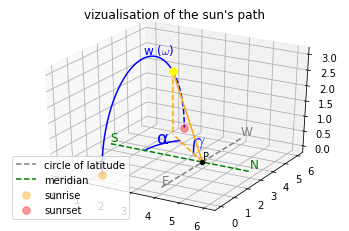

In [2]:
from sunModel import viewSunPath
viewSunPath()

# gestion du temps en python

Les calculs informatiques liés au temps sont relativement simples : il suffit de choisir comme référentiel le temps UTC avec son unixtimestamp.  L'unixtimestamp (uts) est le nombre de secondes écoulées depuis le 01/01/1970 à 00:00:00 UTC

Toutefois, dès qu'on manipule un langage informatique haut niveau, par exemple comme Python, la manipulation du temps est loin d'etre anodine au vu du grand nombre de bibliothèques et de fonctions disponibles.  Il est souvent complexe de s'y retrouver, sauf à lire l'intégralité de la documentation et de faire des essais pas à pas. 

Lorsqu'on travaille avec des timeseries chronologiques, il est essentiel de maîtriser la gestion du temps en machine et notamment les timezone....Il existe une bibliothèque nommé pytz qui permet d'importer dans Python la base de données Olson tz mais içi on va utiliser la bibliothèque dateutil

In [40]:
from datetime import datetime
import time
import calendar
from dateutil import tz

## time.time

La bibliothèque time permet de trouver facilement l'unixtimestamp correspondant à l'instant présent.

On peut le calculer avec la bibliothèque datetime mais ce n'est pas la solution de préférence et même une source d'erreurs. On trouve quelques instructions ci-dessous utilisant datetime et réalisant des conversions en unixtimestamp.

Cette utilisation de datetime permet d'introduire la notion d'objet naif (c'est-à-dire sans timezone) et d'objet aware (complétement déterminé et indiscutable, avec timezone).

Bien entendu, seules les deux dernières instructions utilisant datetime permet de retrouver l'unixtimestamp de l'instant présent, en passant par la fonction now() qui donne la date/heure locale, d'après les indications de fuseau horaire propre à l'ordinateur sur lequel les instructions sont lancées

In [90]:
# actual unixtimestamp using the time module
print(int(time.time()))

# CET = Central European Time
# CEST = Central European Summer Time
# on peut aussi utiliser 'Europe/Paris'


naive=datetime.utcnow()
UTC=tz.gettz('UTC')
aware=datetime.now(UTC)

localnaive=datetime.now()
#CET=tz.gettz('CET')
CET=tz.gettz('Europe/Paris')
localaware=datetime.now(CET)

print("objet naif {} - uts={}".format(naive,naive.strftime("%s")))
print("objet aware {} - uts={}".format(aware,aware.strftime("%s")))
print("objet naif {} - uts={}".format(localnaive, localnaive.strftime("%s")))
print("objet aware {} - uts={}".format(localaware, localaware.strftime("%s")))

1586786185
objet naif 2020-04-13 13:56:25.967871 - uts=1586778985
objet aware 2020-04-13 13:56:25.967965+00:00 - uts=1586782585
objet naif 2020-04-13 15:56:25.968030 - uts=1586786185
objet aware 2020-04-13 15:56:25.968102+02:00 - uts=1586786185


A noter que l'instruction `%s` de strftime permet de calculer l'unixtimestamp
```
%s     The number of seconds since the Epoch, 1970-01-01 00:00:00+0000 (UTC)
```
A ne pas confondre avec `%S` qui retournera le nombre de secondes écoulées depuis la dernière minute.

cf http://man7.org/linux/man-pages/man3/strftime.3.html

## time.gmtime

La fonction gmtime convertit un unixtimestamp en un tuple de type struct_time au format UTC (avec DST=0)

In [57]:
uts=1514764800
tuple=time.gmtime(uts)
print(tuple)

time.struct_time(tm_year=2018, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=0)


L'inverse de cette fonction gmtime est la fonction timegm de la bibliothèque calendar

In [58]:
print(calendar.timegm(tuple))

1514764800


On peut arriver au même résultat en utilisant les fonctions fromtimestamp et timetuple de la bibliothèque datetime. La fonction show ci-dessous permet de décoder l'unixtimestamp dans n'importe quel timezone. 

A noter une illustration d'utilisation de la propriété tzinfo de l'objet _time, de type datetime

In [101]:
def show(uts,tz):
    _time=datetime.fromtimestamp(uts,tz)
    _tuple=_time.timetuple()
    print(_tuple)
    print(_time.strftime('%Y-%m-%d %H:%M:%S'))
    print(_time.tzinfo)
    
show(uts,CET)
print('\r\n')
show(uts,UTC)

time.struct_time(tm_year=2018, tm_mon=12, tm_mday=17, tm_hour=8, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=351, tm_isdst=0)
2018-12-17 08:00:00
tzfile('/usr/share/zoneinfo/Europe/Paris')


time.struct_time(tm_year=2018, tm_mon=12, tm_mday=17, tm_hour=7, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=351, tm_isdst=0)
2018-12-17 07:00:00
tzfile('/usr/share/zoneinfo/UTC')


## datetime.strptime et datetime.timestamp

Lorsqu'on travaille avec une chaine de caractère et qu'on veut calculer l'unixtimestamp correspondant, on commence par utiliser la fonction strptime de la bibliothèque datetime pour convertir la chaine en objet datetime

Il est alors très facile de retrouver le timestamp à l'aide de la fonction timestamp de datetime

Nota : Içi le timezone est bien spécifié dans la chaine (+0100), mais il peut-être parfois utile de savoir spécifier le timezone avant de convertir en tuple ou d'utiliser timestamp

In [92]:
d="2018-01-01T01:00:00+0100"
_time=datetime.strptime(d, '%Y-%m-%dT%H:%M:%S%z')
print(_time)
print(datetime.timestamp(_time))
print(_time.tzinfo)
print(_time.timetuple())
print('\r\n')
_time=_time.replace(tzinfo=CET)
print(_time.timetuple())
print(_time.tzinfo)
print(datetime.timestamp(_time))

2018-01-01 01:00:00+01:00
1514764800.0
UTC+01:00
time.struct_time(tm_year=2018, tm_mon=1, tm_mday=1, tm_hour=1, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=-1)


time.struct_time(tm_year=2018, tm_mon=1, tm_mday=1, tm_hour=1, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=0)
tzfile('/usr/share/zoneinfo/Europe/Paris')
1514764800.0


## Trouver l'unixtimestamp indiquant le début de la journée UTC correspondant à un unixtimestamp donné 

In [105]:
uts=1545030000
tt=time.gmtime(uts)
print("UTC time : ")
print(tt)
print("CET time")
print(show(uts,CET))
print('\r\n')
'''
the structure of a time tuple is always
tm_year, tm_mon, tm_mday, tm_hour, tm_min, tm_sec, tm_wday, tm_yday, tm_isdst
'''
sec_elapsed_since_UTCday_start=tt.tm_hour*3600+tt.tm_min*60+tt.tm_sec
_UTCstart=uts-sec_elapsed_since_UTCday_start
print("the UTC day UTC including unixtimestamp {} started at unixtimestamp \n{}".format(uts,_UTCstart))
print(time.gmtime(_UTCstart))

UTC time : 
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=17, tm_hour=7, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=351, tm_isdst=0)
CET time
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=17, tm_hour=8, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=351, tm_isdst=0)
2018-12-17 08:00:00
tzfile('/usr/share/zoneinfo/Europe/Paris')
None


the UTC day UTC including unixtimestamp 1545030000 started at unixtimestamp 
1545004800
time.struct_time(tm_year=2018, tm_mon=12, tm_mday=17, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=351, tm_isdst=0)
